##Importing Data

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import io

auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/file_out.csv')

##EDA

In [ ]:
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0


In [ ]:
# Get the size of the dataset
df.shape

(33356, 8)

In [ ]:
# Get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33356 entries, 0 to 33355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33356 non-null  int64  
 1   DocumentID  33356 non-null  int64  
 2   Date        33356 non-null  object 
 3   SKU         33356 non-null  int64  
 4   Price       33356 non-null  float64
 5   Discount    33356 non-null  float64
 6   Customer    33356 non-null  int64  
 7   Quantity    33356 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ MB


In [ ]:
# Get summary statistics of the dataset
df.describe()

,Unnamed: 0,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,16677.500000,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,9629.192126,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,8338.750000,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,16677.500000,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,25016.250000,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,33355.000000,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


In [ ]:
# Count unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

Unnamed: 0 33356
DocumentID 15752
Date 1165
SKU 2905
Price 8964
Discount 7623
Customer 606
Quantity 115


##Data Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
DocumentID    0
Date          0
SKU           0
Price         0
Discount      0
Customer      0
Quantity      0
dtype: int64

In [ ]:
# Drop categorical columns except Customer
df_prep = df.drop(['Unnamed: 0', 'DocumentID', 'SKU'], axis=1)

# Rename Customer column
df_prep.rename(columns = {'Customer':'CustomerId'}, inplace=True)

df_prep.head()

,Date,Price,Discount,CustomerId,Quantity
0,2019-09-23,381.78,67.37254,1,1.0
1,2019-09-23,593.22,0.00034,1,1.0
2,2019-09-23,423.73,-0.00119,1,1.0
3,2019-09-23,201.70,35.58814,1,1.0
4,2019-09-23,345.76,61.01966,1,1.0


In [ ]:
# Convert Date column from string to datetime
df_prep['Date'] = pd.to_datetime(df_prep['Date'])
df_prep.head()

,Date,Price,Discount,CustomerId,Quantity
0,2019-09-23,381.78,67.37254,1,1.0
1,2019-09-23,593.22,0.00034,1,1.0
2,2019-09-23,423.73,-0.00119,1,1.0
3,2019-09-23,201.70,35.58814,1,1.0
4,2019-09-23,345.76,61.01966,1,1.0


##Feature Engineering

In [ ]:
# Create a unique dataframe containing the customer id
import numpy as np

df_customer = pd.DataFrame(df_prep['CustomerId'].unique())
df_customer.columns = ['CustomerId']
df_customer.head()

,CustomerId
0,1
1,460
2,479
3,26
4,580


##Calculating RFM-T

###Tenure

In [ ]:
# Get the first purchase date of each customer
from datetime import datetime, timedelta, date

df_tenure = df_prep.groupby('CustomerId').Date.min().reset_index()
df_tenure.columns = ['CustomerId','MinPurchaseDate']
df_tenure.head()

,CustomerId,MinPurchaseDate
0,0,2022-01-15
1,1,2019-02-18
2,2,2019-06-18
3,3,2022-06-04
4,4,2022-06-25


In [ ]:
df_tenure['Tenure'] = (df_prep['Date'].max() - df_tenure['MinPurchaseDate']).dt.days
df_tenure.head()

,CustomerId,MinPurchaseDate,Tenure
0,0,2022-01-15,298
1,1,2019-02-18,1360
2,2,2019-06-18,1240
3,3,2022-06-04,158
4,4,2022-06-25,137


<Axes: xlabel='Tenure', ylabel='Count'>

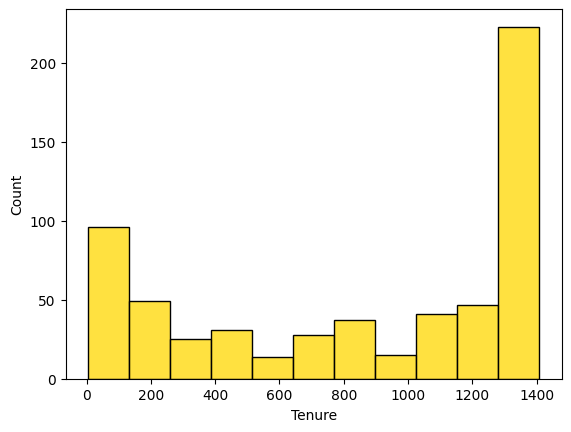

In [ ]:
import seaborn as sns

sns.histplot(data=df_tenure, x='Tenure', color='gold')

##Recency

In [ ]:
# Get the last purchase date for each customer

df_recency = df_prep.groupby('CustomerId').Date.max().reset_index()
df_recency.columns = ['CustomerId','MaxPurchaseDate']
df_recency.head()

,CustomerId,MaxPurchaseDate
0,0,2022-11-09
1,1,2021-03-20
2,2,2022-09-09
3,3,2022-10-30
4,4,2022-10-27


In [ ]:
# Calculate the days difference from customer's last puschase with the dataset's last purchase

df_recency['Recency'] = (df_recency['MaxPurchaseDate'].max() - df_recency['MaxPurchaseDate']).dt.days
df_recency.head()

,CustomerId,MaxPurchaseDate,Recency
0,0,2022-11-09,0
1,1,2021-03-20,599
2,2,2022-09-09,61
3,3,2022-10-30,10
4,4,2022-10-27,13


<Axes: xlabel='Recency', ylabel='Count'>

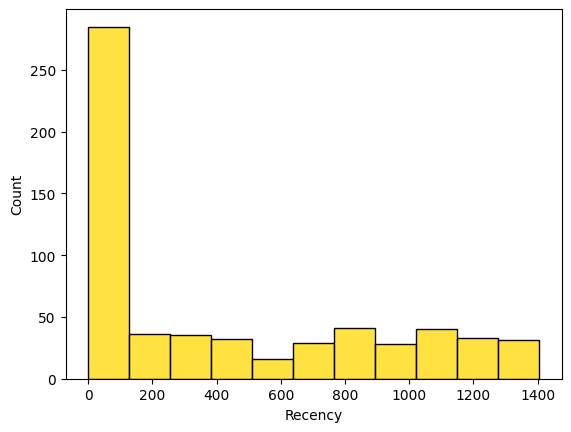

In [ ]:
sns.histplot(data=df_recency, x='Recency', color='gold')

##Frequency

In [ ]:
# Get the purchase frequency for each customer

df_frequency = df_prep.groupby('CustomerId').Date.count().reset_index()
df_frequency.columns = ['CustomerId','Frequency']
df_frequency.head()

,CustomerId,Frequency
0,0,19
1,1,181
2,2,35
3,3,2
4,4,111


<Axes: xlabel='Frequency', ylabel='Count'>

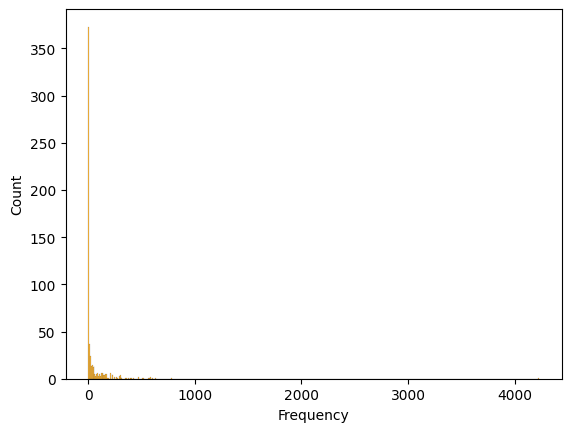

In [ ]:
sns.histplot(data=df_frequency, x='Frequency', color='orange')

##Monetary

In [ ]:
# Get the total price for each invoice

df_prep['TotalPrice'] = df_prep['Price'] * df_prep['Quantity']
df_prep.head()

,Date,Price,Discount,CustomerId,Quantity,TotalPrice
0,2019-09-23,381.78,67.37254,1,1.0,381.78
1,2019-09-23,593.22,0.00034,1,1.0,593.22
2,2019-09-23,423.73,-0.00119,1,1.0,423.73
3,2019-09-23,201.70,35.58814,1,1.0,201.70
4,2019-09-23,345.76,61.01966,1,1.0,345.76


In [ ]:
# Get the total purchase value for each customer

df_monetary = df_prep.groupby('CustomerId').TotalPrice.sum().reset_index()
df_monetary.columns = ['CustomerId','Monetary']

# Format the float values
pd.options.display.float_format = '{:,.2f}'.format

df_monetary.head()

,CustomerId,Monetary
0,0,"378,305.25"
1,1,"788,089.14"
2,2,"197,170.27"
3,3,"5,261.61"
4,4,"45,117,187.72"


<Axes: xlabel='Monetary', ylabel='Count'>

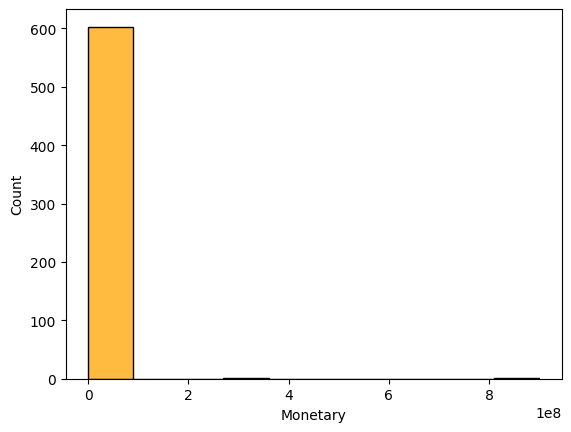

In [ ]:
sns.histplot(data=df_monetary, x='Monetary', bins=10, color='orange')

##Merging RFM-T Dataframes

In [ ]:
# Stitch RFM metrics
df_customer = pd.merge(df_customer, df_recency, on='CustomerId')
df_customer = pd.merge(df_customer, df_tenure, on='CustomerId')
df_customer = pd.merge(df_customer, df_frequency, on='CustomerId')
df_customer = pd.merge(df_customer, df_monetary, on='CustomerId')

# Drop MaxPurchaseDate column
df_customer = df_customer.drop('MinPurchaseDate', axis=1)
df_customer = df_customer.drop('MaxPurchaseDate', axis=1)
df_customer.head()

,CustomerId,Recency,Tenure,Frequency,Monetary
0,1,599,1360,181,"788,089.14"
1,460,1293,1306,3,"84,891.52"
2,479,1047,1401,42,"60,043.93"
3,26,1259,1259,1,"2,500.00"
4,580,1197,1197,1,"11,016.95"


##Modeling

We are going to predict the purchase frequency of each customers in the next 6 months.
We will use the BG/NBD model using the BetaGeoFitter library.

In [ ]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00


In [ ]:
# BG/NBD model works for customers with non-zero variables
df_customer = df_customer[df_customer['Frequency'] > 0]
df_customer = df_customer[df_customer['Recency'] > 0]

In [ ]:
# Train the BG/NBD model
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])

<lifetimes.BetaGeoFitter: fitted with 585 subjects, a: 0.43, alpha: 0.02, b: 6.46, r: 0.15>

In [ ]:
# Predict the frequency for each customer in the next 6 months

t = 180 # number of days in 6 months
df_customer['Frequency_Predicted_6m'] = bgf.conditional_expected_number_of_purchases_up_to_time
 (t, df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])
df_customer

,CustomerId,Recency,Tenure,Frequency,Monetary,Frequency_Predicted_6m
0,1,599,1360,181,"788,089.14",0.00
1,460,1293,1306,3,"84,891.52",0.41
2,479,1047,1401,42,"60,043.93",0.00
3,26,1259,1259,1,"2,500.00",0.15
4,580,1197,1197,1,"11,016.95",0.16
...,...,...,...,...,...,...
601,470,148,148,1,"2,250.00",1.23
602,590,124,124,1,"1,826.88",1.45
603,33,14,14,1,"5,610.03",9.65
604,227,47,47,1,296.61,3.51


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

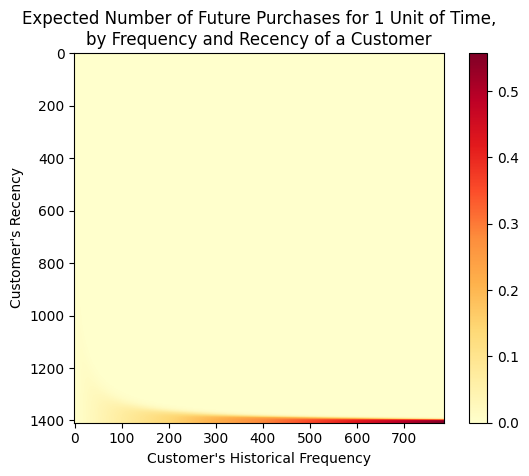

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf, cmap='YlOrRd')

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

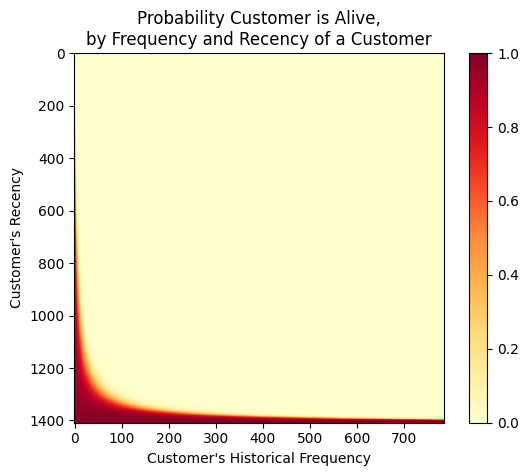

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf, cmap='YlOrRd')

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

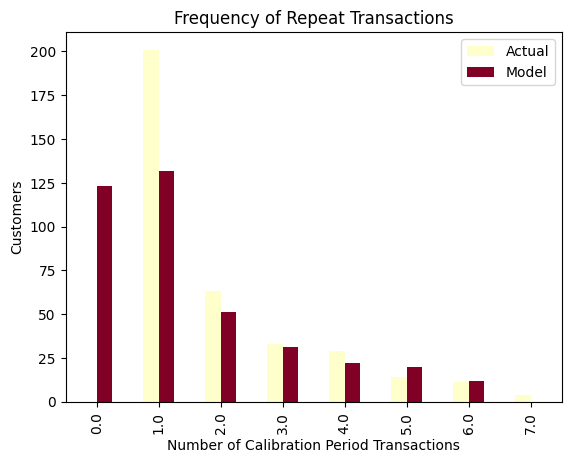

In [ ]:
# Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf, cmap='YlOrRd')

Then we predict the monetary spending of each customers in the next 6 months.
We will use the Gamma-Gamma model using the GammaGammaFitter library.

In [ ]:
# Gamma-Gamma model works if there is a low correlation between F and M
df_customer[["Frequency","Monetary"]].corr()

,Frequency,Monetary
Frequency,1.00,0.28
Monetary,0.28,1.00


In [ ]:
# Train the Gamma-Gamma model
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(df_customer["Frequency"], df_customer["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 585 subjects, p: 2.52, q: 0.12, v: 2.41>

Now we are ready to predict the CLV

In [ ]:
# Predict the monetary for each customer in the next 6 months
df_customer['Monetary_Predicted_6m'] = ggf.customer_lifetime_value(
                                          bgf,
                                          df_customer["Frequency"],
                                          df_customer["Recency"],
                                          df_customer["Tenure"],
                                          df_customer["Monetary"],
                                          time = 6, # time period in months
                                          freq = 'D', # since our Tenure column is in days, we put 'D' here
                                          discount_rate = 0.01)

In [ ]:
df_customer

,CustomerId,Recency,Tenure,Frequency,Monetary,Frequency_Predicted_6m,Monetary_Predicted_6m
0,1,599,1360,181,"788,089.14",0.00,0.00
1,460,1293,1306,3,"84,891.52",0.41,"37,764.42"
2,479,1047,1401,42,"60,043.93",0.00,157.60
3,26,1259,1259,1,"2,500.00",0.15,566.31
4,580,1197,1197,1,"11,016.95",0.16,"2,621.80"
...,...,...,...,...,...,...,...
601,470,148,148,1,"2,250.00",1.23,"4,109.85"
602,590,124,124,1,"1,826.88",1.45,"3,943.04"
603,33,14,14,1,"5,610.03",9.65,"80,715.05"
604,227,47,47,1,296.61,3.51,"1,560.42"
